In [1]:
"""Comparison of different models for a single dataset in a visual form"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_squared_error,
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = load_iris()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [3]:
models = {
    "Linear Regression (as Classifier)": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
}


model_results = []

In [4]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    
    if name == "Linear Regression (as Classifier)":
        y_pred = np.round(model.predict(X_test)).astype(int)
        mse = mean_squared_error(y_test, model.predict(X_test))
    else:
        y_pred = model.predict(X_test)
        mse = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    cross_val_accuracy = np.mean(cross_val_score(model, X, y, cv=5))
 
    model_results.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Cross-Val Accuracy": cross_val_accuracy,
            "Training Time (s)": training_time,
            "Mean Squared Error (if applicable)": mse,
        }
    )

Model Comparison Results:
                               Model  Accuracy  Precision    Recall  F1-Score  \
0  Linear Regression (as Classifier)  0.955556   0.960784  0.955556  0.955357   
1                Logistic Regression  0.933333   0.934524  0.933333  0.933259   
2                      Decision Tree  0.977778   0.979167  0.977778  0.977753   
3          K-Nearest Neighbors (KNN)  0.977778   0.979167  0.977778  0.977753   

   Cross-Val Accuracy  Training Time (s)  Mean Squared Error (if applicable)  
0            0.322561           0.009310                            0.063739  
1            0.973333           0.017643                                 NaN  
2            0.960000           0.001001                                 NaN  
3            0.973333           0.000999                                 NaN  


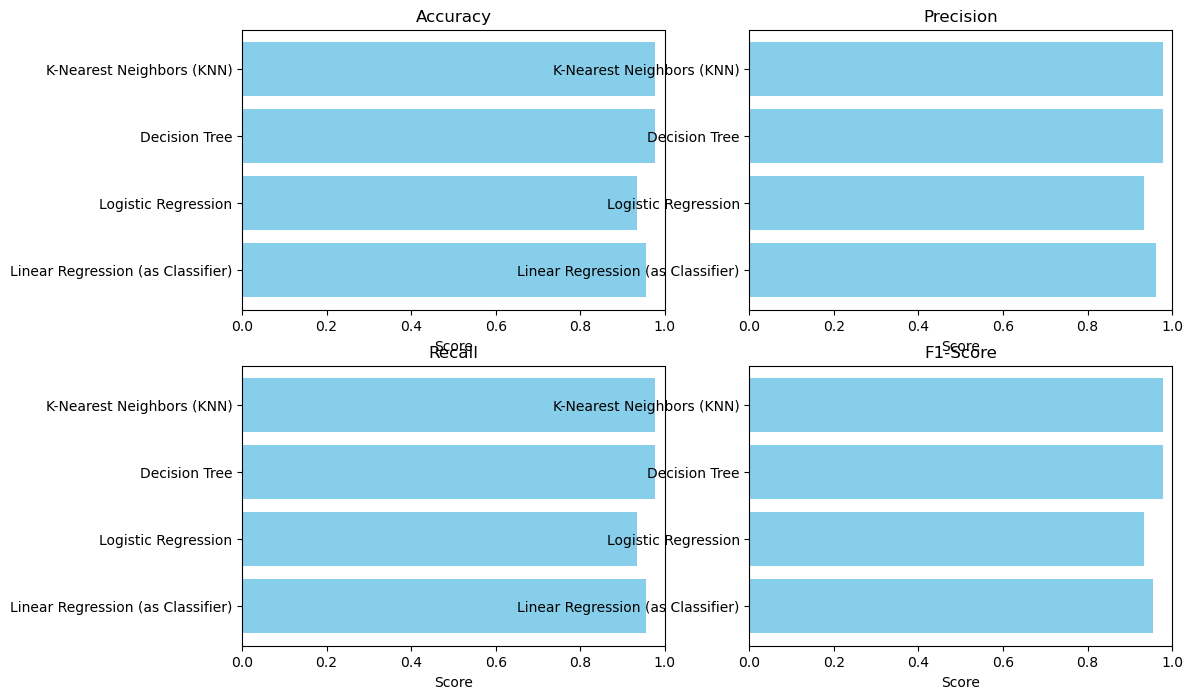

In [5]:
results_df = pd.DataFrame(model_results)

print("Model Comparison Results:")
print(results_df)

plt.figure(figsize=(12, 8))

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.barh(results_df["Model"], results_df[metric], color="skyblue")
    plt.title(metric)
    plt.xlabel("Score")
    plt.xlim(0, 1)

In [6]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

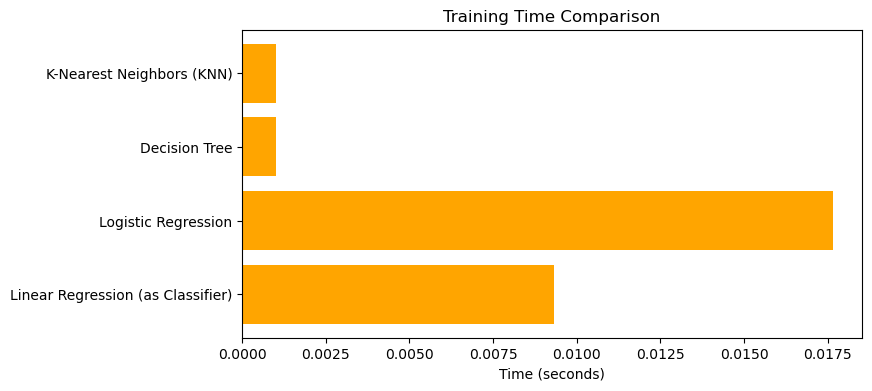

In [7]:
plt.figure(figsize=(8, 4))
plt.barh(results_df["Model"], results_df["Training Time (s)"], color="orange")
plt.title("Training Time Comparison")
plt.xlabel("Time (seconds)")
plt.show()